<a href="https://colab.research.google.com/github/aroraChiraag/BDB650/blob/main/WS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

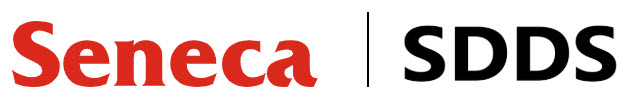

# **Business Analytics**
## **Workshop1-PartFive**
## Student Names 
## Manreet Kaur and Chirag Arora

## Score Prediction Model
### - Problem Statement:
What will be predicted score if a student studies for 9.25 hrs in a day?

### - Approach:
In this part, we will predict the percentage of marks using linear regression that students are expected to score based on the number of hours they studied. You will implement a simple linear regression task as it involves just two variables.

In [ ]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [ ]:
# Use %config InlineBackend.figure_format = 'retina' 
# after %matplotlib inline to render higher resolution images
%config InlineBackend.figure_format = 'retina'

In [ ]:
# If you wish to use Google colab, the following code will allow you to mount your Google Drive. Otherwise, comment on the following lines.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
#Reading the data from google drive
data=pd.read_csv('gdrive/My Drive/Colab Notebooks/WS1/ws1data/WS1DataSet.csv')
#Print that data imported successfully
print("Data imported successfully")
data.head(10)
data.columns
print('\n\n')
data.dtypes

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Index(['Hours', 'Scores'], dtype='object')

Hours     float64
Scores      int64
dtype: object

In [ ]:
# Describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## - Data Cleaning:
**Checking for null values**

In [ ]:
#Write your code here
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### **Write your observations here:**
Dataset contains no null values.

## - Data Visualization:
Plot 2-D graph to find any kind of relationship between the two parameters- **Hours** and **Scores**.

Text(0.5, 1.0, 'Relationship between Hours and Scores')

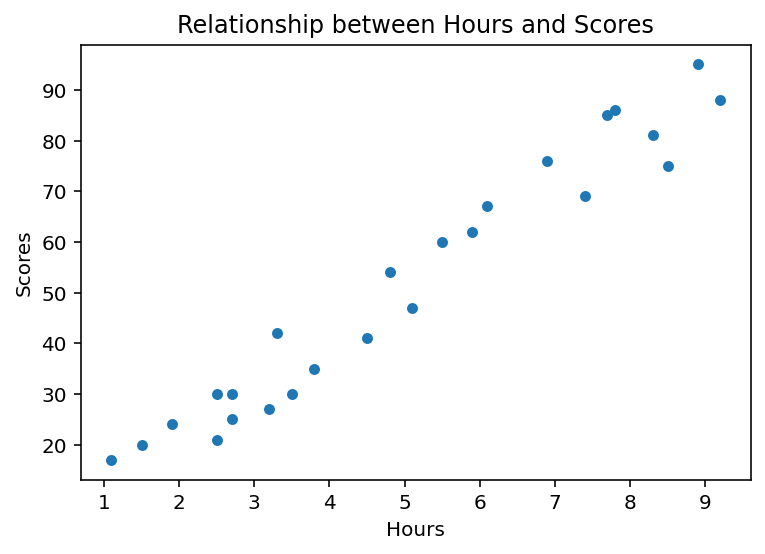

In [ ]:
#Write your code here
plt.figure()
data.plot("Hours","Scores", kind="scatter")
plt.title("Relationship between Hours and Scores")
plt.savefig("ccoresVShours.png")

## Find the corelation between the number of hours studied and scores obtained

In [ ]:
#Write your code here
data.Hours.corr(data.Scores)

0.9761906560220887

#### **Write your observations here:**
The scatterplot of hours and scores shows that there is a positive and linear relationship between hours studied and scores obtained.
Moreover, the correlation coefficient is positive and large which depicts that there is postive and strong relationship between hours studied and scores obtained.


## - Preparing the data:

**Split the data for training $80\%$ and testing $20\%$**


In [ ]:
#Write your code here
x_train,x_test,y_train,y_test=train_test_split(data.Hours,data.Scores,test_size=0.2)
x_train = np.array(x_train).reshape((-1, 1))
x_test = np.array(x_test).reshape((-1, 1))
y_train = np.array(y_train)
y_test = np.array(y_test)

**Training the data using Linear Regression Algorithm**

In [ ]:
#Write your code here
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

# print the coefficients
print("Intercept of linear regression line : " ,model.intercept_)
print("Coefficient of variable hours in linear model : ", model.coef_)

LinearRegression()

Intercept of linear regression line :  2.003561003839799
Coefficient of variable hours in linear model :  [9.96743139]


### Plot the Linear regression line

Text(0.5, 1.0, 'Linear Regression Line')

Text(0.5, 0, 'Hours spent on studying')

Text(0, 0.5, 'Scores')

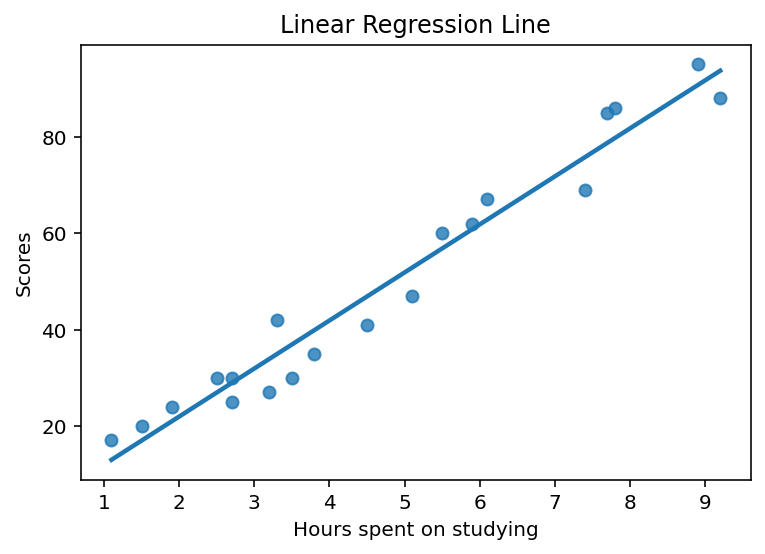

In [ ]:
#Write your code here
sns.regplot(x_train, y_train, ci = None)
plt.title("Linear Regression Line")
plt.xlabel("Hours spent on studying")
plt.ylabel("Scores")

#### **Write your observations here:**

The above plot clearly shows that distance between points (actual scores) and predicted scores on regression line is quite small which depicts that linear regression model fits the training data.

## Making Predictions:
Now, we have trained our algorithm, it's time to make some predictions.

Generate the prediction for Test data set

In [ ]:
#Write your code here
y_pred_test = model.predict(x_test)

### Comparing Actual vs Predicted

In [ ]:
#Write your code here
#Table for actual and predicted
print("Actual","Predicted")
res = "\n".join("{}     {}".format(x, round(y, 2)) for x, y in zip(y_test, y_pred_test))
print(res)
#reisdual to compare the actual vs predicted
print("\nResidual")
residual = y_test - y_pred_test
print([round(elem, 2) for elem in residual])

Actual Predicted
21     26.92
76     70.78
54     49.85
75     86.73
81     84.73

Residual
[-5.92, 5.22, 4.15, -11.73, -3.73]


### What is the accuracy of training and testing data

In [ ]:
#Write your code here
score = model.score(x_test, y_test)
print("For Testing Data :" ,round(score,3))

score = model.score(x_train, y_train)
print("For Training Data :" ,round(score,3))

For Testing Data : 0.906
For Training Data : 0.959


#### **Write your observations here:**

* Accuracy measure is used for classification models, so here for linear regression model, r-squared score is calculated to measure goodness of fit of model. 
* For testing dataset, 90.6% of variance in scores obtained by student is explained by model whereas for testing dataset 95.9% of variance in scores is explained by model.
* However, the r squared value for both training and testing dataset is close to 1 which depicts that linear regression model is good fit for both training and testing data.



### Now, generate the prediction for study hours 9.25

In [ ]:
#Write your code here
pred_score = model.predict(np.array([9.25]).reshape(-1,1))
print("Predicted scores after studying for 9.25 hours is", round(pred_score[0],3))

Predicted scores after studing for 9.25 hours is 94.202


### - Evaluating the Model:
The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different<br>
algorithms perform on a particular dataset.

- How much Mean Absolute Error?
- How much Mean Squared Error?
- How much Root Mean Squared Error:?
- How much $R^2$?

In [ ]:
#Write your code here
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error :",metrics.mean_squared_error(y_test, y_pred_test))
print("Root mean squared  Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R^2 : ", metrics.r2_score(y_test, y_pred_test))

Mean Absolute Error : 6.151207911088965
Mean Squared Error : 46.20619901389564
Root mean squared  Error: 6.797514179013946
R^2 :  0.9064348796899894


#### **Write your observations here:**

* Mean Absolute Error is absolute error between actual scores and predicted scores based on parameter hours spent on studying. The mean absolute error between predicted scores and actual scores is 6.15 which is quite good.

* Mean Squared Error measures average squared difference between actual scores and predicted scores. The mean squared error for linear regression model for predicting scores is 46.21

* Root Mean Squared Error is square root of mean squared error between actual and predicted scored by model. The root mean squared error is 6.798.

* 90.6% of variance in scores obtained by student is explained by model. Therefore, r squared value is close to 1 which depicts that linear regression model is good fit.


### - Conclusion:

#### **Write your Answer here:**

To conclude, the linear regression model has r squared value close to 1 which shows that maximum variance in scores obtained is explained by model and this model also have low mean abosolute error and root mean squared error which is less than 7. Hence, the linear regression model is good fit for predicting scores obtained based on hours spent on studying by student.

The final linear regression model is : 
scores obtained = 2.0035 + 9.97 (Hours spent on studying)